In [134]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [135]:
df_raw = pd.read_csv('IT Salary Survey EU  2020.csv',skipinitialspace = True)

In [136]:
pd.set_option('display.max_columns',None)

In [137]:
df_raw.head(3)

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,Yearly brutto salary (without bonus and stocks) in EUR,Yearly bonus + stocks in EUR,Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",80000.0,5000,75000.0,10000,30,Full-time employee,Unlimited contract,English,51-100,Product,No,NaN,NaN
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,80000.0,NaN,82000.0,5000,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",120000.0,120000,100000.0,100000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes,NaN,NaN


In [138]:
df_raw.shape

(1253, 23)

In [139]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 23 columns):
 #   Column                                                                                                                   Non-Null Count  Dtype  
---  ------                                                                                                                   --------------  -----  
 0   Timestamp                                                                                                                1253 non-null   object 
 1   Age                                                                                                                      1226 non-null   float64
 2   Gender                                                                                                                   1243 non-null   object 
 3   City                                                                                                                     1253 non-null   o

In [140]:
df_raw.describe()

,Age,Yearly brutto salary (without bonus and stocks) in EUR,Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week"
count,1226.000000,1.253000e+03,8.850000e+02,373.000000
mean,32.509788,8.027904e+07,6.322459e+05,12.967828
std,5.663804,2.825061e+09,1.680508e+07,15.275174
min,20.000000,1.000100e+04,1.100000e+04,0.000000
25%,29.000000,5.880000e+04,5.500000e+04,0.000000
50%,32.000000,7.000000e+04,6.500000e+04,0.000000
75%,35.000000,8.000000e+04,7.500000e+04,30.000000
max,69.000000,1.000000e+11,5.000000e+08,40.000000


In [141]:
df_raw.columns

Index(['Timestamp', 'Age', 'Gender', 'City', 'Position ',
       'Total years of experience', 'Years of experience in Germany',
       'Seniority level', 'Your main technology / programming language',
       'Other technologies/programming languages you use often',
       'Yearly brutto salary (without bonus and stocks) in EUR',
       'Yearly bonus + stocks in EUR',
       'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country',
       'Annual bonus+stocks one year ago. Only answer if staying in same country',
       'Number of vacation days', 'Employment status', 'Сontract duration',
       'Main language at work', 'Company size', 'Company type',
       'Have you lost your job due to the coronavirus outbreak?',
       'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week',
       'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 20

In [142]:
null_values = df_raw.isna().sum().sort_values(ascending = False)
null_values

Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week                          880
Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR    791
Annual bonus+stocks one year ago. Only answer if staying in same country                                                   639
Yearly bonus + stocks in EUR                                                                                               424
Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country                   368
Other technologies/programming languages you use often                                                                     157
Your main technology / programming language                                                                                127
Number of vacation days                                                                                        

In [143]:
null_values_percentage = null_values/df_raw.shape[0]*100

In [144]:
null_values_percentage

Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week                          70.231445
Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR    63.128492
Annual bonus+stocks one year ago. Only answer if staying in same country                                                   50.997606
Yearly bonus + stocks in EUR                                                                                               33.838787
Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country                   29.369513
Other technologies/programming languages you use often                                                                     12.529928
Your main technology / programming language                                                                                10.135674
Number of vacation days                                              

<function matplotlib.pyplot.show(close=None, block=None)>

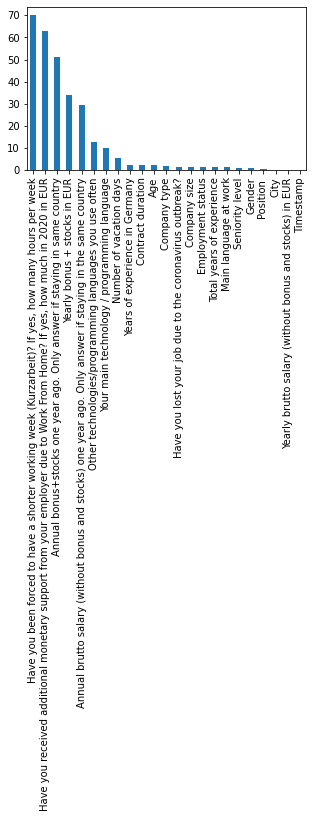

In [145]:
null_values_percentage.plot(kind='bar',figsize = (5,3))
plt.show

In [146]:
df_raw

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,Yearly brutto salary (without bonus and stocks) in EUR,Yearly bonus + stocks in EUR,Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",80000.0,5000,75000.0,10000,30,Full-time employee,Unlimited contract,English,51-100,Product,No,NaN,NaN
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,80000.0,NaN,82000.0,5000,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",120000.0,120000,100000.0,100000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes,NaN,NaN
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,NaN,54000.0,NaN,NaN,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup,No,NaN,NaN
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",62000.0,NaN,62000.0,NaN,29,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248,18/01/2021 15:05:50,31.0,Male,Berlin,Backend Developer,9,5,Senior,Java,"Python, Javascript / Typescript, Java / Scala,...",70000.0,72000,70000.0,72000,26,Full-time employee,Unlimited contract,English,51-100,Product,Yes,NaN,NaN
1249,18/01/2021 17:46:02,33.0,Male,Berlin,Researcher/ Consumer Insights Analyst,10,1.5,Senior,consumer analysis,NaN,60000.0,3000,48000.0,2500,unlimited,Full-time employee,Unlimited contract,English,1000+,Product,No,NaN,0
1250,18/01/2021 23:20:35,39.0,Male,Munich,IT Operations Manager,15,2,Lead,PHP,"Python, C/C++, Javascript / Typescript, Java /...",110000.0,0,90000.0,NaN,28,Full-time employee,Unlimited contract,English,101-1000,eCommerce,No,NaN,NaN
1251,19/01/2021 10:17:58,26.0,Male,Saarbrücken,Frontend Developer,7,7,Middle,JavaScript,"Javascript / Typescript, Docker, HTML, CSS; Ad...",38350.0,40950,33800.0,36400,27,Full-time employee,Unlimited contract,German,101-1000,Product,No,NaN,0


In [147]:
df = df_raw.drop(['Other technologies/programming languages you use often','Employment status',
       'Yearly bonus + stocks in EUR','Years of experience in Germany',
       'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country',
       'Annual bonus+stocks one year ago. Only answer if staying in same country',
       'Employment status',
       'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week',
       'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR'],axis = 1)

In [148]:
df

,Timestamp,Age,Gender,City,Position,Total years of experience,Seniority level,Your main technology / programming language,Yearly brutto salary (without bonus and stocks) in EUR,Number of vacation days,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5,Senior,TypeScript,80000.0,30,Unlimited contract,English,51-100,Product,No
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7,Senior,Ruby,80000.0,28,Unlimited contract,English,101-1000,Product,No
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12,Lead,Javascript / Typescript,120000.0,30,Temporary contract,English,101-1000,Product,Yes
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4,Junior,Javascript,54000.0,24,Unlimited contract,English,51-100,Startup,No
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17,Senior,C# .NET,62000.0,29,Unlimited contract,English,101-1000,Product,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248,18/01/2021 15:05:50,31.0,Male,Berlin,Backend Developer,9,Senior,Java,70000.0,26,Unlimited contract,English,51-100,Product,Yes
1249,18/01/2021 17:46:02,33.0,Male,Berlin,Researcher/ Consumer Insights Analyst,10,Senior,consumer analysis,60000.0,unlimited,Unlimited contract,English,1000+,Product,No
1250,18/01/2021 23:20:35,39.0,Male,Munich,IT Operations Manager,15,Lead,PHP,110000.0,28,Unlimited contract,English,101-1000,eCommerce,No
1251,19/01/2021 10:17:58,26.0,Male,Saarbrücken,Frontend Developer,7,Middle,JavaScript,38350.0,27,Unlimited contract,German,101-1000,Product,No


In [149]:
df.shape

(1253, 15)

In [150]:
df.isna().sum().sort_values(ascending = False)

Your main technology / programming language                127
Number of vacation days                                     68
Сontract duration                                           29
Age                                                         27
Company type                                                25
Have you lost your job due to the coronavirus outbreak?     20
Company size                                                18
Total years of experience                                   16
Main language at work                                       16
Seniority level                                             12
Gender                                                      10
Position                                                     6
Timestamp                                                    0
City                                                         0
Yearly brutto salary (without bonus and stocks) in EUR       0
dtype: int64

In [151]:
df['Position '].value_counts()

Software Engineer            387
Backend Developer            174
Data Scientist               110
Frontend Developer            89
QA Engineer                   71
                            ... 
Testautomation                 1
Recruiter                      1
DBA                            1
DB developer/Data analyst      1
IT Operations Manager          1
Name: Position , Length: 148, dtype: int64

In [152]:
df['Position '] =  df['Position '].fillna("Software Engineer")

In [153]:
df['Gender'].value_counts()

Male       1049
Female      192
Diverse       2
Name: Gender, dtype: int64

In [154]:
df['Gender'] =  df['Gender'].fillna("Male")

In [155]:
df.isna().sum()

Timestamp                                                    0
Age                                                         27
Gender                                                       0
City                                                         0
Position                                                     0
Total years of experience                                   16
Seniority level                                             12
Your main technology / programming language                127
Yearly brutto salary (without bonus and stocks) in EUR       0
Number of vacation days                                     68
Сontract duration                                           29
Main language at work                                       16
Company size                                                18
Company type                                                25
Have you lost your job due to the coronavirus outbreak?     20
dtype: int64

In [156]:
df['Seniority level'].value_counts()

Senior                                       565
Middle                                       366
Lead                                         166
Junior                                        79
Head                                          44
Principal                                      3
student                                        1
Intern                                         1
Entry level                                    1
Working Student                                1
C-Level                                        1
no idea, there are no ranges in the firm       1
Student                                        1
intern                                         1
Key                                            1
C-level executive manager                      1
Director                                       1
No level                                       1
CTO                                            1
Work Center Manager                            1
Manager             

In [157]:
df['Seniority level'] = df['Seniority level'].fillna('Senior')

In [158]:
df['Main language at work'].value_counts()

English               1020
German                 186
Russian                 12
Italian                  3
Spanish                  3
English and German       2
Polish                   2
Русский                  2
Czech                    2
50/50                    1
Deuglisch                1
French                   1
both                     1
Russian, English         1
Name: Main language at work, dtype: int64

In [159]:
df['Main language at work'] = df['Main language at work'].fillna('English')

<AxesSubplot:>

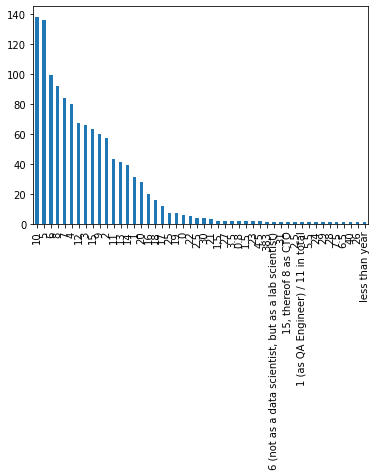

In [160]:
df['Total years of experience'].value_counts().plot(kind='bar')

In [161]:
df[['Total years of experience']] = df[['Total years of experience']].apply(pd.to_numeric, errors='coerce')

In [162]:
df['Total years of experience'].value_counts().describe()

count     42.000000
mean      29.285714
std       38.487430
min        1.000000
25%        2.000000
50%        6.500000
75%       53.500000
max      138.000000
Name: Total years of experience, dtype: float64

In [163]:
df['Total years of experience'].value_counts().median()

6.5

In [164]:
df['Total years of experience'] = df['Total years of experience'].fillna(df['Total years of experience'].value_counts().median())

In [165]:
df['Company size'].value_counts()

1000+       448
101-1000    405
11-50       174
51-100      147
up to 10     61
Name: Company size, dtype: int64

In [166]:
df['Company size'].value_counts().describe()

count      5.000000
mean     247.000000
std      169.771906
min       61.000000
25%      147.000000
50%      174.000000
75%      405.000000
max      448.000000
Name: Company size, dtype: float64

In [167]:
df['Company size'] = df['Company size'].fillna('11-50')

In [168]:
df['Have you lost your job due to the coronavirus outbreak?'].value_counts()

No                                                                                        1162
Yes                                                                                         63
i didn't but will be looking for new one because of covid                                    1
kurzarbeitzeit for 1.5 months                                                                1
Have been a freelancer at the beginning of year                                              1
No, but there was a salary cut at 10% for 3 months and then at 5% for further 3 months       1
Lost the job but for different reason                                                        1
Leads and project inquiries have slowed down                                                 1
Laid off for a bit                                                                           1
yes but found a new one with better pay / perks                                              1
Name: Have you lost your job due to the coronaviru

In [169]:
df['Have you lost your job due to the coronavirus outbreak?'] = df['Have you lost your job due to the coronavirus outbreak?'].fillna('No')

In [170]:
df.isna().sum().sort_values(ascending = False)

Your main technology / programming language                127
Number of vacation days                                     68
Сontract duration                                           29
Age                                                         27
Company type                                                25
Timestamp                                                    0
Gender                                                       0
City                                                         0
Position                                                     0
Total years of experience                                    0
Seniority level                                              0
Yearly brutto salary (without bonus and stocks) in EUR       0
Main language at work                                        0
Company size                                                 0
Have you lost your job due to the coronavirus outbreak?      0
dtype: int64

In [171]:
df[['Number of vacation days']] = df[['Number of vacation days']].apply(pd.to_numeric, errors='coerce')

In [172]:
df['Number of vacation days'].median()

28.0

In [173]:
df['Number of vacation days']

0       30.0
1       28.0
2       30.0
3       24.0
4       29.0
        ... 
1248    26.0
1249     NaN
1250    28.0
1251    27.0
1252    30.0
Name: Number of vacation days, Length: 1253, dtype: float64

In [174]:
df['Number of vacation days'] = df['Number of vacation days'].fillna(df['Number of vacation days'].median())

In [175]:
df['Age'].describe()

count    1226.000000
mean       32.509788
std         5.663804
min        20.000000
25%        29.000000
50%        32.000000
75%        35.000000
max        69.000000
Name: Age, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Count'>

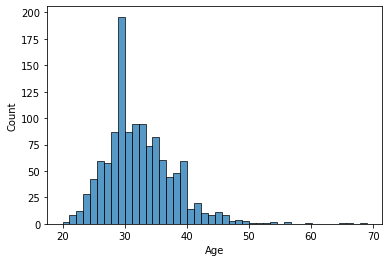

In [176]:
sns.histplot(df['Age'])

In [177]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [178]:
df = df.dropna(subset = ["Your main technology / programming language", "Сontract duration", "Company type"])

In [179]:
df.isna().sum()

Timestamp                                                  0
Age                                                        0
Gender                                                     0
City                                                       0
Position                                                   0
Total years of experience                                  0
Seniority level                                            0
Your main technology / programming language                0
Yearly brutto salary (without bonus and stocks) in EUR     0
Number of vacation days                                    0
Сontract duration                                          0
Main language at work                                      0
Company size                                               0
Company type                                               0
Have you lost your job due to the coronavirus outbreak?    0
dtype: int64

In [180]:
len(df)/len(df_raw)*100

87.78930566640064

In [181]:
df.shape

(1100, 15)

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1100 entries, 0 to 1252
Data columns (total 15 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Timestamp                                                1100 non-null   object 
 1   Age                                                      1100 non-null   float64
 2   Gender                                                   1100 non-null   object 
 3   City                                                     1100 non-null   object 
 4   Position                                                 1100 non-null   object 
 5   Total years of experience                                1100 non-null   float64
 6   Seniority level                                          1100 non-null   object 
 7   Your main technology / programming language              1100 non-null   object 
 8   Yearly brutto salary (withou

In [183]:
df.head()

,Timestamp,Age,Gender,City,Position,Total years of experience,Seniority level,Your main technology / programming language,Yearly brutto salary (without bonus and stocks) in EUR,Number of vacation days,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5.0,Senior,TypeScript,80000.0,30.0,Unlimited contract,English,51-100,Product,No
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7.0,Senior,Ruby,80000.0,28.0,Unlimited contract,English,101-1000,Product,No
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12.0,Lead,Javascript / Typescript,120000.0,30.0,Temporary contract,English,101-1000,Product,Yes
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4.0,Junior,Javascript,54000.0,24.0,Unlimited contract,English,51-100,Startup,No
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17.0,Senior,C# .NET,62000.0,29.0,Unlimited contract,English,101-1000,Product,No


In [184]:
columns_rename = {'Total years of experience': 'Experience(Y)',
        'Your main technology / programming language': 'Your Domain',
        'Yearly brutto salary (without bonus and stocks) in EUR': 'Gross Salary(EUR)',
                 'Number of vacation days':'vacation',
                 'Have you lost your job due to the coronavirus outbreak?':'Job lost(COVID)'}
df.rename(columns=columns_rename,
          inplace=True)

In [185]:
df

,Timestamp,Age,Gender,City,Position,Experience(Y),Seniority level,Your Domain,Gross Salary(EUR),vacation,Сontract duration,Main language at work,Company size,Company type,Job lost(COVID)
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5.0,Senior,TypeScript,80000.0,30.0,Unlimited contract,English,51-100,Product,No
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7.0,Senior,Ruby,80000.0,28.0,Unlimited contract,English,101-1000,Product,No
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12.0,Lead,Javascript / Typescript,120000.0,30.0,Temporary contract,English,101-1000,Product,Yes
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4.0,Junior,Javascript,54000.0,24.0,Unlimited contract,English,51-100,Startup,No
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17.0,Senior,C# .NET,62000.0,29.0,Unlimited contract,English,101-1000,Product,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248,18/01/2021 15:05:50,31.0,Male,Berlin,Backend Developer,9.0,Senior,Java,70000.0,26.0,Unlimited contract,English,51-100,Product,Yes
1249,18/01/2021 17:46:02,33.0,Male,Berlin,Researcher/ Consumer Insights Analyst,10.0,Senior,consumer analysis,60000.0,28.0,Unlimited contract,English,1000+,Product,No
1250,18/01/2021 23:20:35,39.0,Male,Munich,IT Operations Manager,15.0,Lead,PHP,110000.0,28.0,Unlimited contract,English,101-1000,eCommerce,No
1251,19/01/2021 10:17:58,26.0,Male,Saarbrücken,Frontend Developer,7.0,Middle,JavaScript,38350.0,27.0,Unlimited contract,German,101-1000,Product,No


## UNIVARIATE ANALYSIS

<AxesSubplot:>

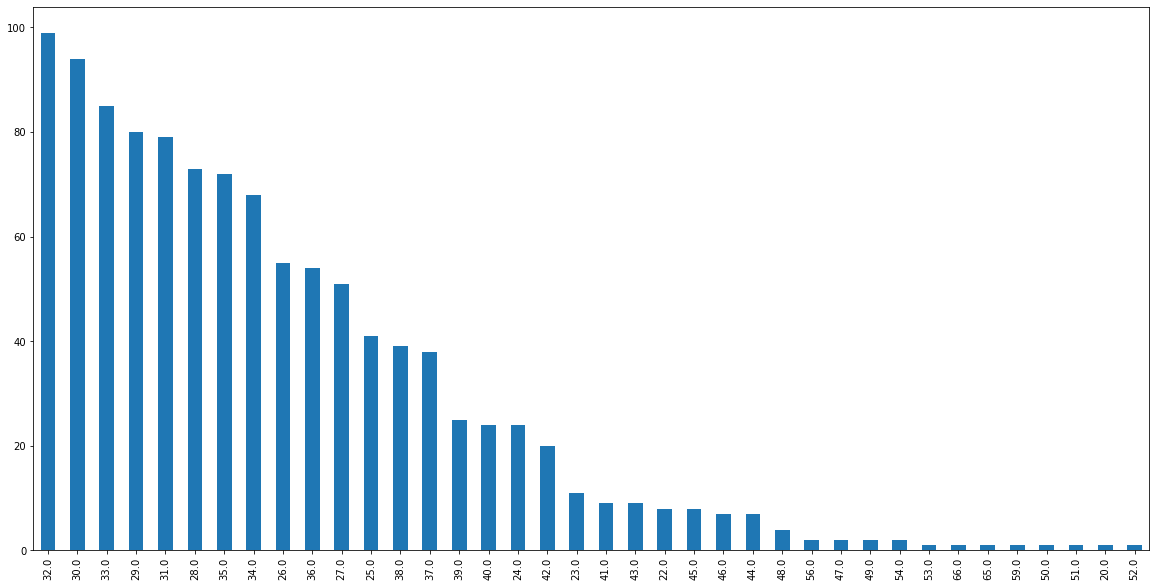

In [186]:
df['Age'].value_counts().plot(kind='bar',figsize = (20,10))

<AxesSubplot:>

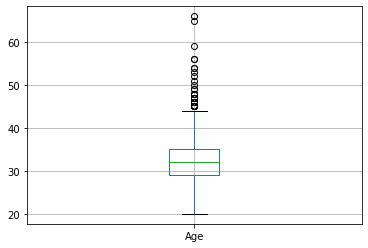

In [187]:
df.boxplot(column='Age')

In [188]:
df['Age'].describe()

count    1100.000000
mean       32.407273
std         5.562249
min        20.000000
25%        29.000000
50%        32.000000
75%        35.000000
max        66.000000
Name: Age, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Density'>

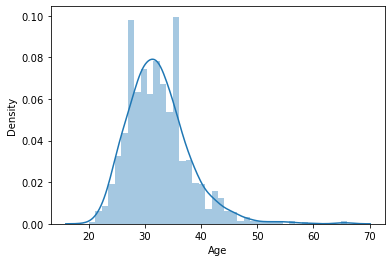

In [189]:
sns.distplot(df['Age'])

<AxesSubplot:xlabel='Age', ylabel='Count'>

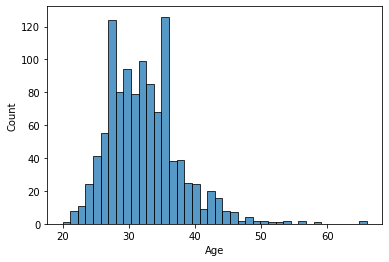

In [190]:
sns.histplot(df['Age'])

<AxesSubplot:xlabel='Gender', ylabel='count'>

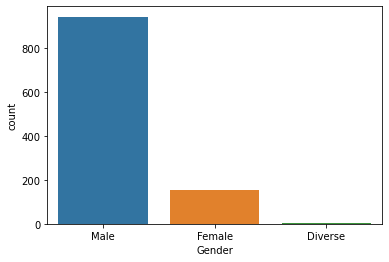

In [191]:
sns.countplot(df['Gender'])

<AxesSubplot:>

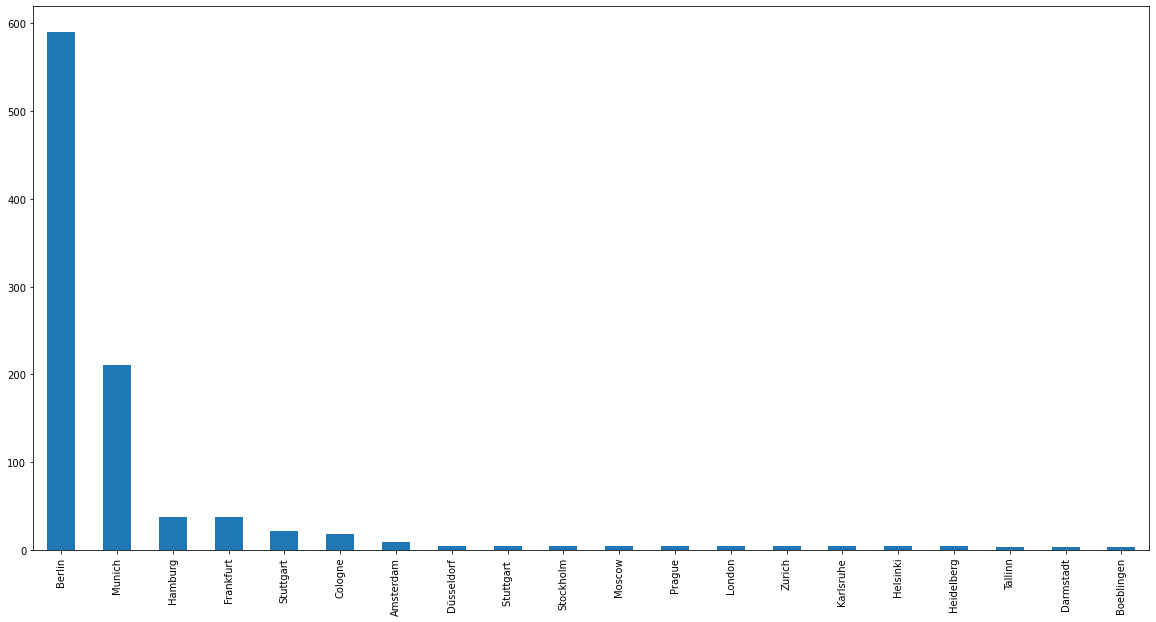

In [192]:
df['City'].value_counts()[:20].plot(kind='bar',figsize=(20,10))

<AxesSubplot:>

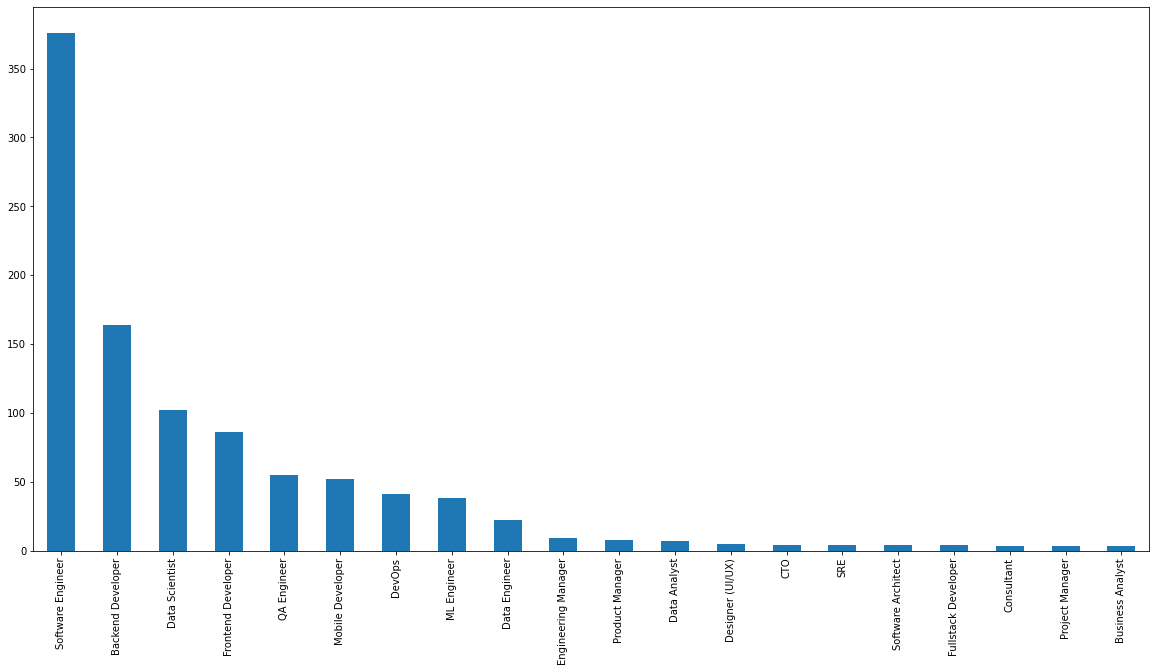

In [193]:
df['Position '].value_counts()[:20].plot(kind='bar',figsize=(20,10))

<AxesSubplot:>

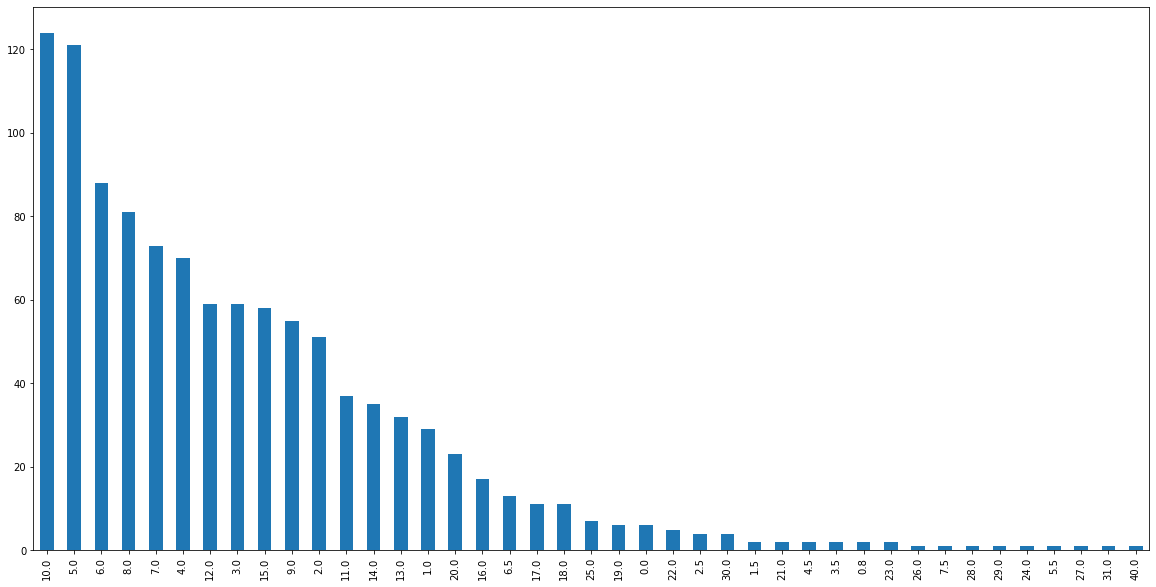

In [194]:
df['Experience(Y)'].value_counts().plot(kind='bar',figsize=(20,10))

<AxesSubplot:>

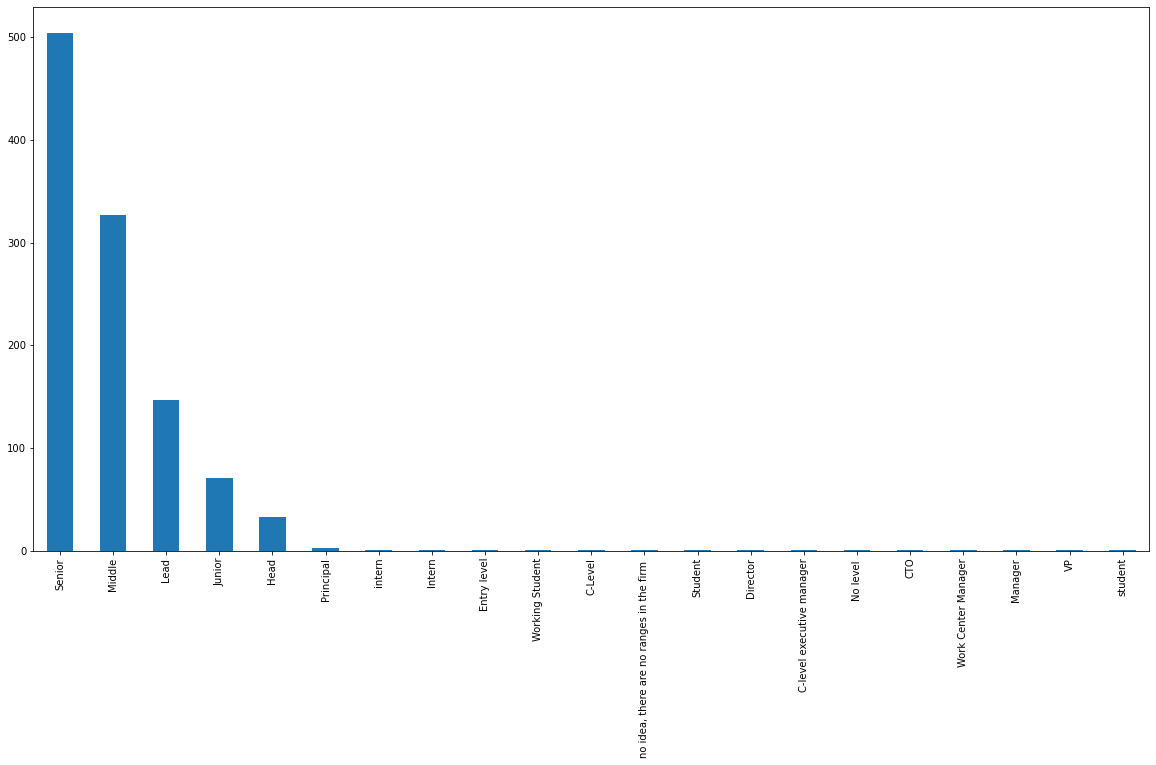

In [195]:
df['Seniority level'].value_counts().plot(kind='bar',figsize=(20,10))

In [196]:
df[df['Seniority level'] == 'intern']

,Timestamp,Age,Gender,City,Position,Experience(Y),Seniority level,Your Domain,Gross Salary(EUR),vacation,Сontract duration,Main language at work,Company size,Company type,Job lost(COVID)
601,25/11/2020 14:08:39,29.0,Female,Berlin,Data Scientist,0.0,intern,Python,20000.0,25.0,Temporary contract,English,1000+,Product,No


In [197]:
df['Seniority level'] = df['Seniority level'].str.lower()

<AxesSubplot:>

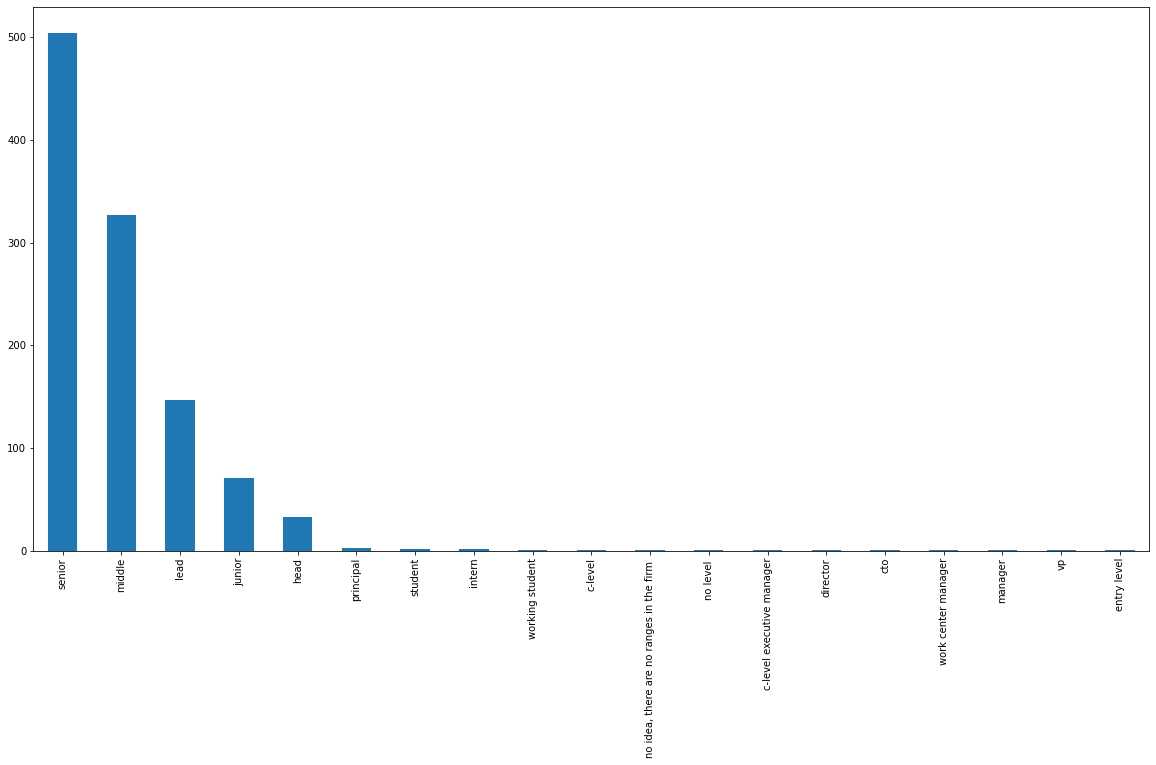

In [198]:
df['Seniority level'].value_counts().plot(kind='bar',figsize=(20,10))

In [199]:
df['Your Domain'].str.replace(' ', '')

0                  TypeScript
1                        Ruby
2       Javascript/Typescript
3                  Javascript
4                      C#.NET
                ...          
1248                     Java
1249         consumeranalysis
1250                      PHP
1251               JavaScript
1252                     yaml
Name: Your Domain, Length: 1100, dtype: object

In [200]:
df['Your Domain'] = df['Your Domain'].str.lower()

In [201]:
df[df['Your Domain']== 'python ']

,Timestamp,Age,Gender,City,Position,Experience(Y),Seniority level,Your Domain,Gross Salary(EUR),vacation,Сontract duration,Main language at work,Company size,Company type,Job lost(COVID)
163,24/11/2020 12:18:41,32.0,Male,Frankfurt,Network Engineer,10.0,senior,python,68500.0,25.0,Unlimited contract,English,101-1000,Product,No
186,24/11/2020 12:40:25,31.0,Male,Berlin,Data Scientist,10.0,lead,python,115000.0,28.0,Unlimited contract,English,1000+,Product,No
191,24/11/2020 12:48:17,30.0,Female,Berlin,QA Engineer,5.0,middle,python,50000.0,30.0,Unlimited contract,German,101-1000,Product,No
330,24/11/2020 17:29:51,32.0,Male,Munich,Data Scientist,2.0,middle,python,54000.0,20.0,Unlimited contract,English,51-100,Product,No
344,24/11/2020 17:45:03,26.0,Male,Frankfurt,Software Engineer,3.0,middle,python,48000.0,27.0,Unlimited contract,English,51-100,Consulting / Agency,No
376,24/11/2020 18:49:33,46.0,Male,Munich,Software Engineer,10.0,senior,python,68500.0,28.0,Unlimited contract,English,51-100,Startup,No
413,24/11/2020 20:18:31,37.0,Male,Berlin,Software Engineer,8.0,senior,python,76900.0,26.0,Unlimited contract,English,101-1000,Product,No
494,25/11/2020 09:00:23,39.0,Male,Berlin,Manager,11.0,head,python,180000.0,28.0,Unlimited contract,English,1000+,Product,No
498,25/11/2020 09:05:43,31.0,Male,Hamburg,ML Engineer,3.0,lead,python,70000.0,30.0,Unlimited contract,English,11-50,Startup,No
522,25/11/2020 10:44:20,28.0,Male,Berlin,Data Scientist,4.0,middle,python,70000.0,28.0,Unlimited contract,English,101-1000,Product,No


In [202]:
df['Your Domain'].str.strip()

0                    typescript
1                          ruby
2       javascript / typescript
3                    javascript
4                       c# .net
                 ...           
1248                       java
1249          consumer analysis
1250                        php
1251                 javascript
1252                       yaml
Name: Your Domain, Length: 1100, dtype: object

<AxesSubplot:>

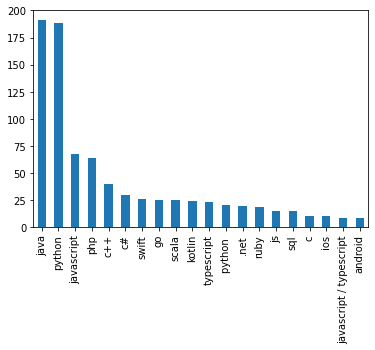

In [203]:
df['Your Domain'].value_counts()[:20].plot(kind='bar')

In [204]:
df['Your Domain'].value_counts()[:15]

java          191
python        188
javascript     68
php            64
c++            40
c#             30
swift          26
go             25
scala          25
kotlin         24
typescript     23
python         21
.net           20
ruby           19
js             15
Name: Your Domain, dtype: int64

<AxesSubplot:>

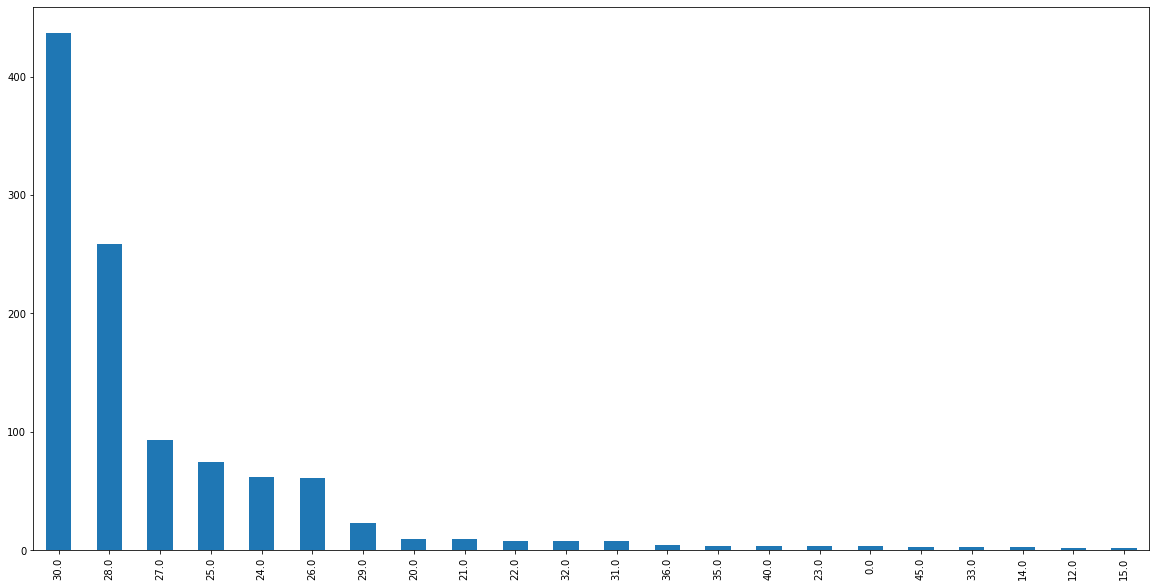

In [205]:
df['vacation'].value_counts()[:15].plot(kind='bar',figsize=(20,10))

<AxesSubplot:>

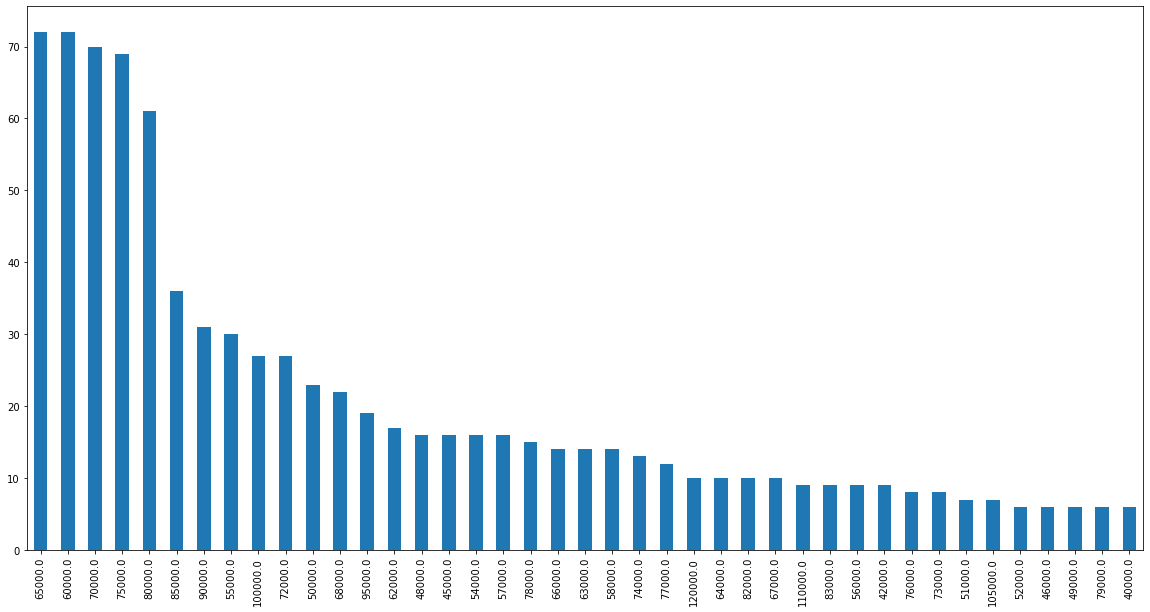

In [206]:
df['Gross Salary(EUR)'].value_counts()[:40000].plot(kind='bar',figsize=(20,10))

<AxesSubplot:xlabel='Сontract duration', ylabel='count'>

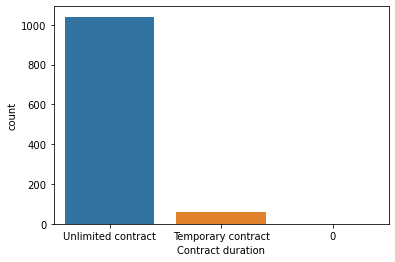

In [207]:
sns.countplot(df['Сontract duration'])

<AxesSubplot:>

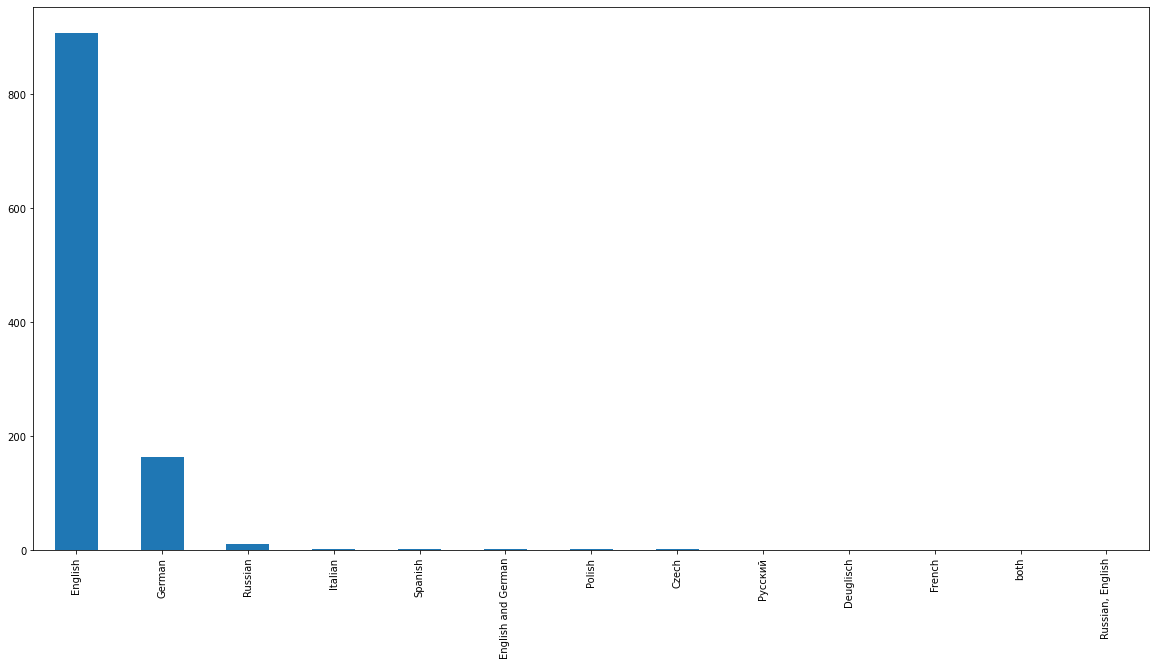

In [208]:
df['Main language at work'].value_counts().plot(kind='bar',figsize=(20,10))

In [209]:
df['Company size'].value_counts()

1000+       398
101-1000    361
11-50       156
51-100      130
up to 10     55
Name: Company size, dtype: int64

<AxesSubplot:>

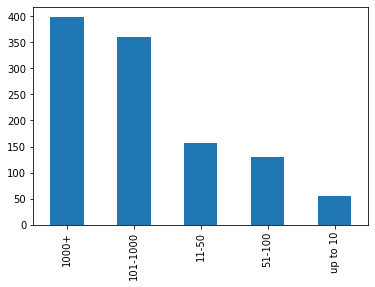

In [210]:
df['Company size'].value_counts().plot(kind='bar')

<AxesSubplot:>

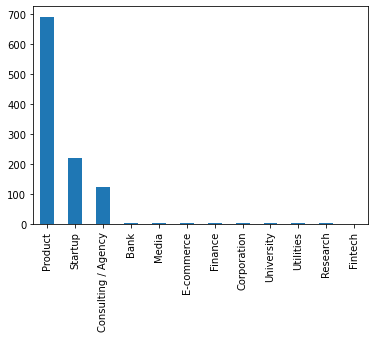

In [211]:
df['Company type'].value_counts()[:12].plot(kind='bar')

In [212]:
df['Job lost(COVID)'].value_counts()

No                                                                                        1037
Yes                                                                                         57
i didn't but will be looking for new one because of covid                                    1
Have been a freelancer at the beginning of year                                              1
No, but there was a salary cut at 10% for 3 months and then at 5% for further 3 months       1
Leads and project inquiries have slowed down                                                 1
Laid off for a bit                                                                           1
yes but found a new one with better pay / perks                                              1
Name: Job lost(COVID), dtype: int64

<AxesSubplot:>

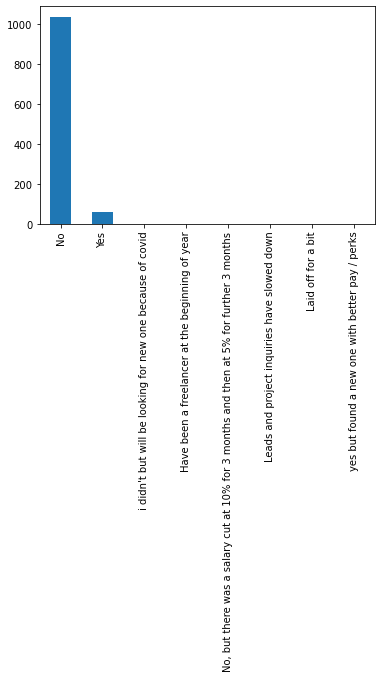

In [213]:
df['Job lost(COVID)'].value_counts().plot(kind='bar')

In [214]:
df.head()

,Timestamp,Age,Gender,City,Position,Experience(Y),Seniority level,Your Domain,Gross Salary(EUR),vacation,Сontract duration,Main language at work,Company size,Company type,Job lost(COVID)
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5.0,senior,typescript,80000.0,30.0,Unlimited contract,English,51-100,Product,No
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7.0,senior,ruby,80000.0,28.0,Unlimited contract,English,101-1000,Product,No
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12.0,lead,javascript / typescript,120000.0,30.0,Temporary contract,English,101-1000,Product,Yes
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4.0,junior,javascript,54000.0,24.0,Unlimited contract,English,51-100,Startup,No
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17.0,senior,c# .net,62000.0,29.0,Unlimited contract,English,101-1000,Product,No


In [215]:
df['Gender'].value_counts(normalize=True)

Male       0.856364
Female     0.141818
Diverse    0.001818
Name: Gender, dtype: float64

In [216]:
df.shape

(1100, 15)

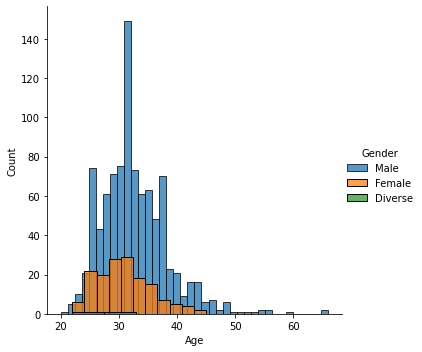

In [217]:
sns.FacetGrid(df,hue='Gender',size=5).map(sns.histplot,'Age').add_legend()

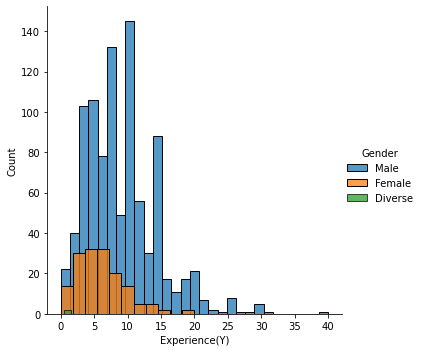

In [218]:
sns.FacetGrid(df,hue='Gender',size=5).map(sns.histplot,'Experience(Y)').add_legend()

In [219]:
df['Experience(Y)'].value_counts()[:25]

10.0    124
5.0     121
6.0      88
8.0      81
7.0      73
4.0      70
12.0     59
3.0      59
15.0     58
9.0      55
2.0      51
11.0     37
14.0     35
13.0     32
1.0      29
20.0     23
16.0     17
6.5      13
17.0     11
18.0     11
25.0      7
Name: Experience(Y), dtype: int64

In [220]:
Experience = df['Experience(Y)'].value_counts()

In [221]:
df['Gross Salary(EUR)'].value_counts()

65000.0     72
60000.0     72
70000.0     70
75000.0     69
80000.0     61
            ..
63700.0      1
156000.0     1
34000.0      1
79300.0      1
38350.0      1
Name: Gross Salary(EUR), Length: 192, dtype: int64

<AxesSubplot:>

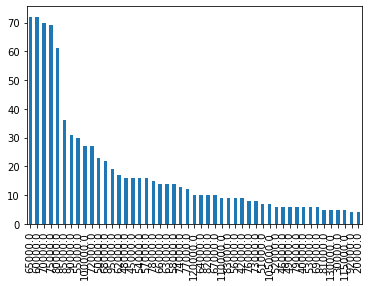

In [222]:
df['Gross Salary(EUR)'].value_counts()[:20000].plot(kind='bar')

<AxesSubplot:xlabel='Gross Salary(EUR)', ylabel='Experience(Y)'>

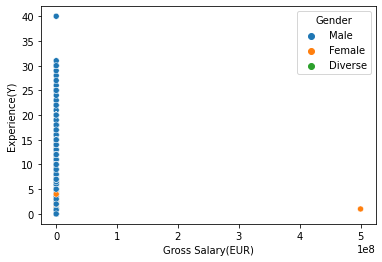

In [223]:
sns.scatterplot(df['Gross Salary(EUR)'],df['Experience(Y)'],hue=df['Gender'])

In [224]:
df['Gross Salary(EUR)'].max()

500000000.0

In [225]:
df['Gross Salary(EUR)'] = df['Gross Salary(EUR)'].replace([500000000], [50000])

In [226]:
df['Gross Salary(EUR)'].max()

850000.0

<AxesSubplot:xlabel='Experience(Y)', ylabel='Gross Salary(EUR)'>

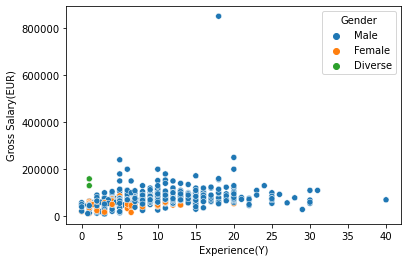

In [227]:
sns.scatterplot(df['Experience(Y)'],df['Gross Salary(EUR)'],hue=df['Gender'])

In [228]:
df['Gross Salary(EUR)'] = df['Gross Salary(EUR)'].replace([85000], [84000])

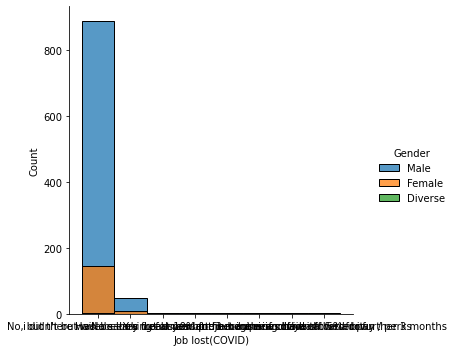

In [229]:
sns.FacetGrid(df,hue='Gender',size=5).map(sns.histplot,'Job lost(COVID)').add_legend()

In [230]:
df['Job lost(COVID)'].value_counts()

No                                                                                        1037
Yes                                                                                         57
i didn't but will be looking for new one because of covid                                    1
Have been a freelancer at the beginning of year                                              1
No, but there was a salary cut at 10% for 3 months and then at 5% for further 3 months       1
Leads and project inquiries have slowed down                                                 1
Laid off for a bit                                                                           1
yes but found a new one with better pay / perks                                              1
Name: Job lost(COVID), dtype: int64

In [231]:
df['Job lost(COVID)'] = df['Job lost(COVID)'].replace(["i didn't but will be looking for new one because of covid",
                                                      "Have been a freelancer at the beginning of year",
                                                       "No, but there was a salary cut at 10% for 3 months and then at 5% for further 3 months",
                                                      "Leads and project inquiries have slowed down","Laid off for a bit",
                                                      "yes but found a new one with better pay / perks"], ['No','No','No','No','No','No'])

In [232]:
df['Job lost(COVID)'].value_counts()

No     1043
Yes      57
Name: Job lost(COVID), dtype: int64

In [233]:
df.corr()

,Age,Experience(Y),Gross Salary(EUR),vacation
Age,1.000000,0.710072,0.199176,0.095682
Experience(Y),0.710072,1.000000,0.302707,0.060003
Gross Salary(EUR),0.199176,0.302707,1.000000,0.083410
vacation,0.095682,0.060003,0.083410,1.000000


<AxesSubplot:>

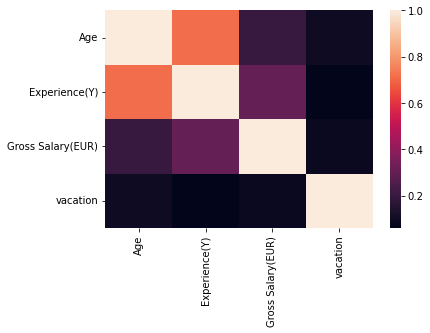

In [234]:
sns.heatmap(df.corr())

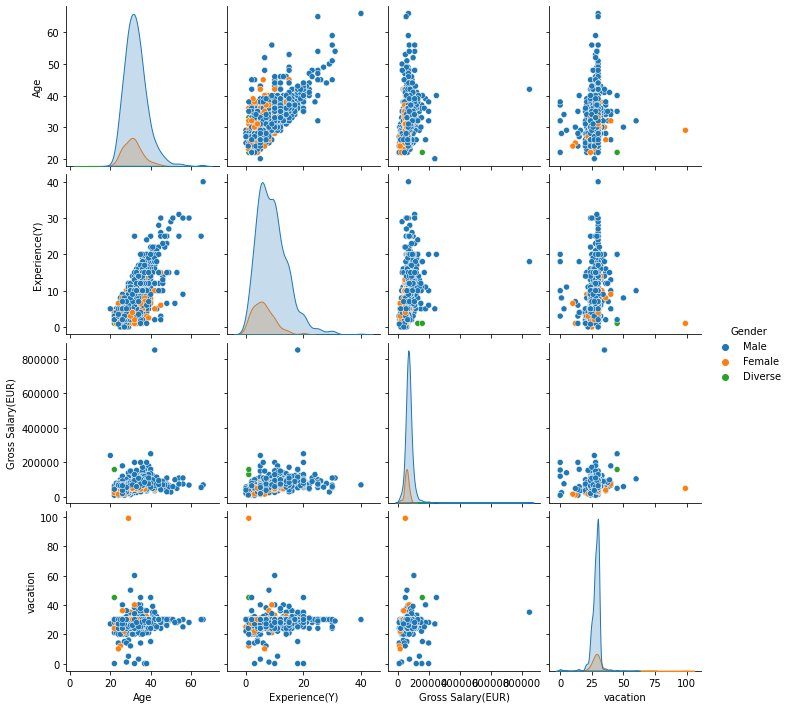

In [235]:
sns.pairplot(hue='Gender',data=df)

In [236]:
df['Seniority level'].value_counts()

senior                                       504
middle                                       327
lead                                         147
junior                                        71
head                                          33
principal                                      3
student                                        2
intern                                         2
working student                                1
c-level                                        1
no idea, there are no ranges in the firm       1
no level                                       1
c-level executive manager                      1
director                                       1
cto                                            1
work center manager                            1
manager                                        1
vp                                             1
entry level                                    1
Name: Seniority level, dtype: int64

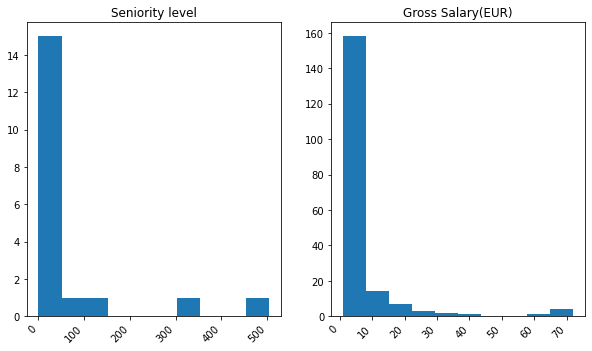

In [237]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2, figsize = (10,6));
# rotates the xticks by 45 degrees
fig.autofmt_xdate(rotation=45)
# titles
ax[0].set_title('Seniority level')
ax[1].set_title('Gross Salary(EUR)')

# draw histograms
ax[0].hist(df['Seniority level'].value_counts())
ax[1].hist(df['Gross Salary(EUR)'].value_counts());

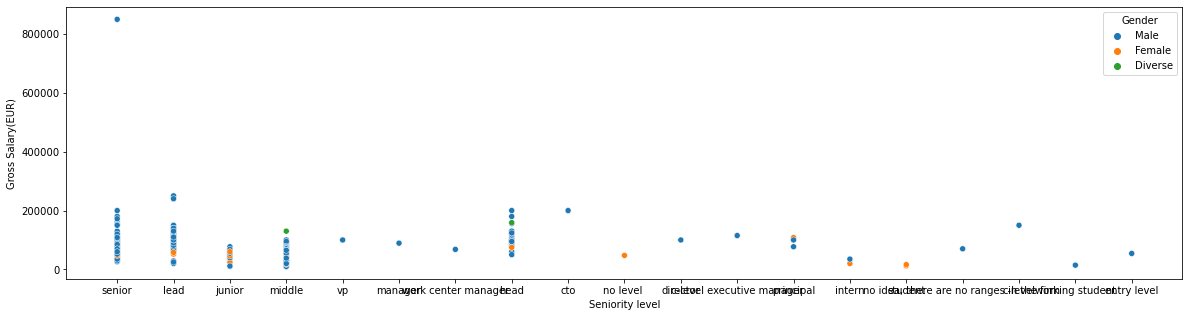

In [238]:
plt.figure(figsize = (20,5))
g = sns.scatterplot(df['Seniority level'],df['Gross Salary(EUR)'],hue =df['Gender'])

In [239]:
fig = px.scatter(df, x="Seniority level", y="Gross Salary(EUR)", color="Gender", symbol="Gender",width=800, height=1000)
fig.show()

In [240]:
df.head(2)

,Timestamp,Age,Gender,City,Position,Experience(Y),Seniority level,Your Domain,Gross Salary(EUR),vacation,Сontract duration,Main language at work,Company size,Company type,Job lost(COVID)
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5.0,senior,typescript,80000.0,30.0,Unlimited contract,English,51-100,Product,No
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7.0,senior,ruby,80000.0,28.0,Unlimited contract,English,101-1000,Product,No


In [241]:
df['Experience(Y)'].value_counts()

10.0    124
5.0     121
6.0      88
8.0      81
7.0      73
4.0      70
12.0     59
3.0      59
15.0     58
9.0      55
2.0      51
11.0     37
14.0     35
13.0     32
1.0      29
20.0     23
16.0     17
6.5      13
17.0     11
18.0     11
25.0      7
19.0      6
0.0       6
22.0      5
2.5       4
30.0      4
1.5       2
21.0      2
4.5       2
3.5       2
0.8       2
23.0      2
26.0      1
7.5       1
28.0      1
29.0      1
24.0      1
5.5       1
27.0      1
31.0      1
40.0      1
Name: Experience(Y), dtype: int64

In [242]:
df['Experience(Y)'].unique()

array([ 5. ,  7. , 12. ,  4. , 17. ,  6. ,  8. , 15. ,  2. , 25. , 14. ,
       11. , 30. , 18. , 13. , 10. ,  3. , 40. , 26. , 23. ,  9. , 19. ,
       20. ,  5.5, 22. , 16. ,  0.8,  1. ,  6.5,  1.5, 21. ,  7.5,  2.5,
       28. , 29. , 24. ,  0. ,  4.5, 27. , 31. ,  3.5])

In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1100 entries, 0 to 1252
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              1100 non-null   object 
 1   Age                    1100 non-null   float64
 2   Gender                 1100 non-null   object 
 3   City                   1100 non-null   object 
 4   Position               1100 non-null   object 
 5   Experience(Y)          1100 non-null   float64
 6   Seniority level        1100 non-null   object 
 7   Your Domain            1100 non-null   object 
 8   Gross Salary(EUR)      1100 non-null   float64
 9   vacation               1100 non-null   float64
 10  Сontract duration      1100 non-null   object 
 11  Main language at work  1100 non-null   object 
 12  Company size           1100 non-null   object 
 13  Company type           1100 non-null   object 
 14  Job lost(COVID)        1100 non-null   object 
dtypes: f